<a href="https://colab.research.google.com/github/YangHyunu/SKT-FLY-AI-5/blob/main/1%EC%A3%BC%EC%B0%A8/5%EC%9D%BC_xgb_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install --q ipython-autotime
#%load_ext autotime

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
SEED = 42

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SKT FLY AI /weather_classification_data.csv')

In [ ]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
df.describe() #  온도 습도??

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [ ]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

## 칼럼명 전처리

In [ ]:
df.columns=[col.lower().replace('(',"").replace(')',"").replace('%','').rstrip().replace(' ','_') for col in df.columns]
df

,temperature,humidity,wind_speed,precipitation,cloud_cover,atmospheric_pressure,uv_index,season,visibility_km,location,weather_type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [ ]:
df=df.drop(['season','location','wind_speed'],axis=1)
df

,temperature,humidity,precipitation,cloud_cover,atmospheric_pressure,uv_index,visibility_km,weather_type
0,14.0,73,82.0,partly cloudy,1010.82,2,3.5,Rainy
1,39.0,96,71.0,partly cloudy,1011.43,7,10.0,Cloudy
2,30.0,64,16.0,clear,1018.72,5,5.5,Sunny
3,38.0,83,82.0,clear,1026.25,7,1.0,Sunny
4,27.0,74,66.0,overcast,990.67,1,2.5,Rainy
...,...,...,...,...,...,...,...,...
13195,10.0,74,71.0,overcast,1003.15,1,1.0,Rainy
13196,-1.0,76,23.0,cloudy,1067.23,1,6.0,Snowy
13197,30.0,77,28.0,overcast,1012.69,3,9.0,Cloudy
13198,3.0,76,94.0,overcast,984.27,0,2.0,Snowy


In [ ]:
df.columns

Index(['temperature', 'humidity', 'precipitation', 'cloud_cover',
       'atmospheric_pressure', 'uv_index', 'visibility_km', 'weather_type'],
      dtype='object')

In [ ]:
df['weather_type'].value_counts()

weather_type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

## 범주형 변수

In [ ]:
col_cate=df.select_dtypes(include=['object'])
col_cate

,cloud_cover,weather_type
0,partly cloudy,Rainy
1,partly cloudy,Cloudy
2,clear,Sunny
3,clear,Sunny
4,overcast,Rainy
...,...,...
13195,overcast,Rainy
13196,cloudy,Snowy
13197,overcast,Cloudy
13198,overcast,Snowy


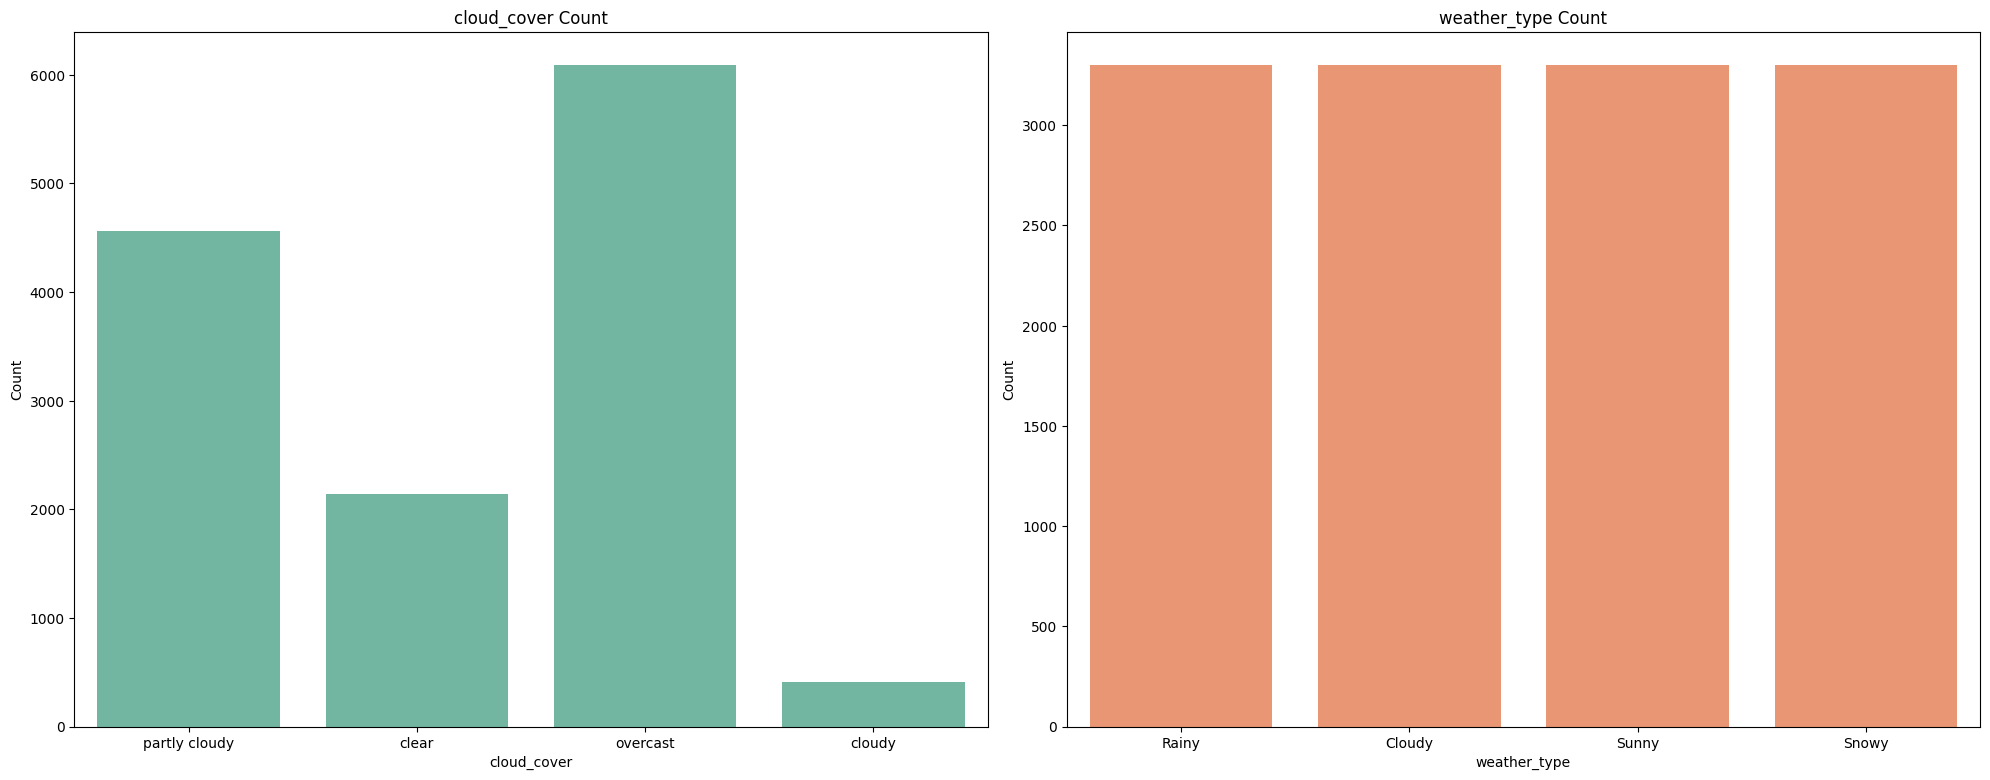

In [ ]:
# 색상 설정
colors = sns.color_palette("Set2", len(col_cate.columns))

n = 2
plots_per_row = n
plots_per_col = n

num_rows = len(col_cate.columns) // plots_per_row + (len(col_cate.columns) % plots_per_row > 0)

fig, axes = plt.subplots(nrows=plots_per_row, ncols=plots_per_col, figsize=(20, 15))

axes = axes.flatten()

for i, (col, color) in enumerate(zip(col_cate.columns, colors)):
    sns.countplot(x=col,data=col_cate,ax=axes[i], color=color)
    axes[i].set_title(f"{col} Count")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 연속형 변수

In [ ]:
col_nums =df.select_dtypes(include=['number'])
col_nums

,temperature,humidity,precipitation,atmospheric_pressure,uv_index,visibility_km
0,14.0,73,82.0,1010.82,2,3.5
1,39.0,96,71.0,1011.43,7,10.0
2,30.0,64,16.0,1018.72,5,5.5
3,38.0,83,82.0,1026.25,7,1.0
4,27.0,74,66.0,990.67,1,2.5
...,...,...,...,...,...,...
13195,10.0,74,71.0,1003.15,1,1.0
13196,-1.0,76,23.0,1067.23,1,6.0
13197,30.0,77,28.0,1012.69,3,9.0
13198,3.0,76,94.0,984.27,0,2.0


## 연속형

In [ ]:
col_nums =df.select_dtypes(include=['number'])
col_nums

,temperature,humidity,precipitation,atmospheric_pressure,uv_index,visibility_km
0,14.0,73,82.0,1010.82,2,3.5
1,39.0,96,71.0,1011.43,7,10.0
2,30.0,64,16.0,1018.72,5,5.5
3,38.0,83,82.0,1026.25,7,1.0
4,27.0,74,66.0,990.67,1,2.5
...,...,...,...,...,...,...
13195,10.0,74,71.0,1003.15,1,1.0
13196,-1.0,76,23.0,1067.23,1,6.0
13197,30.0,77,28.0,1012.69,3,9.0
13198,3.0,76,94.0,984.27,0,2.0


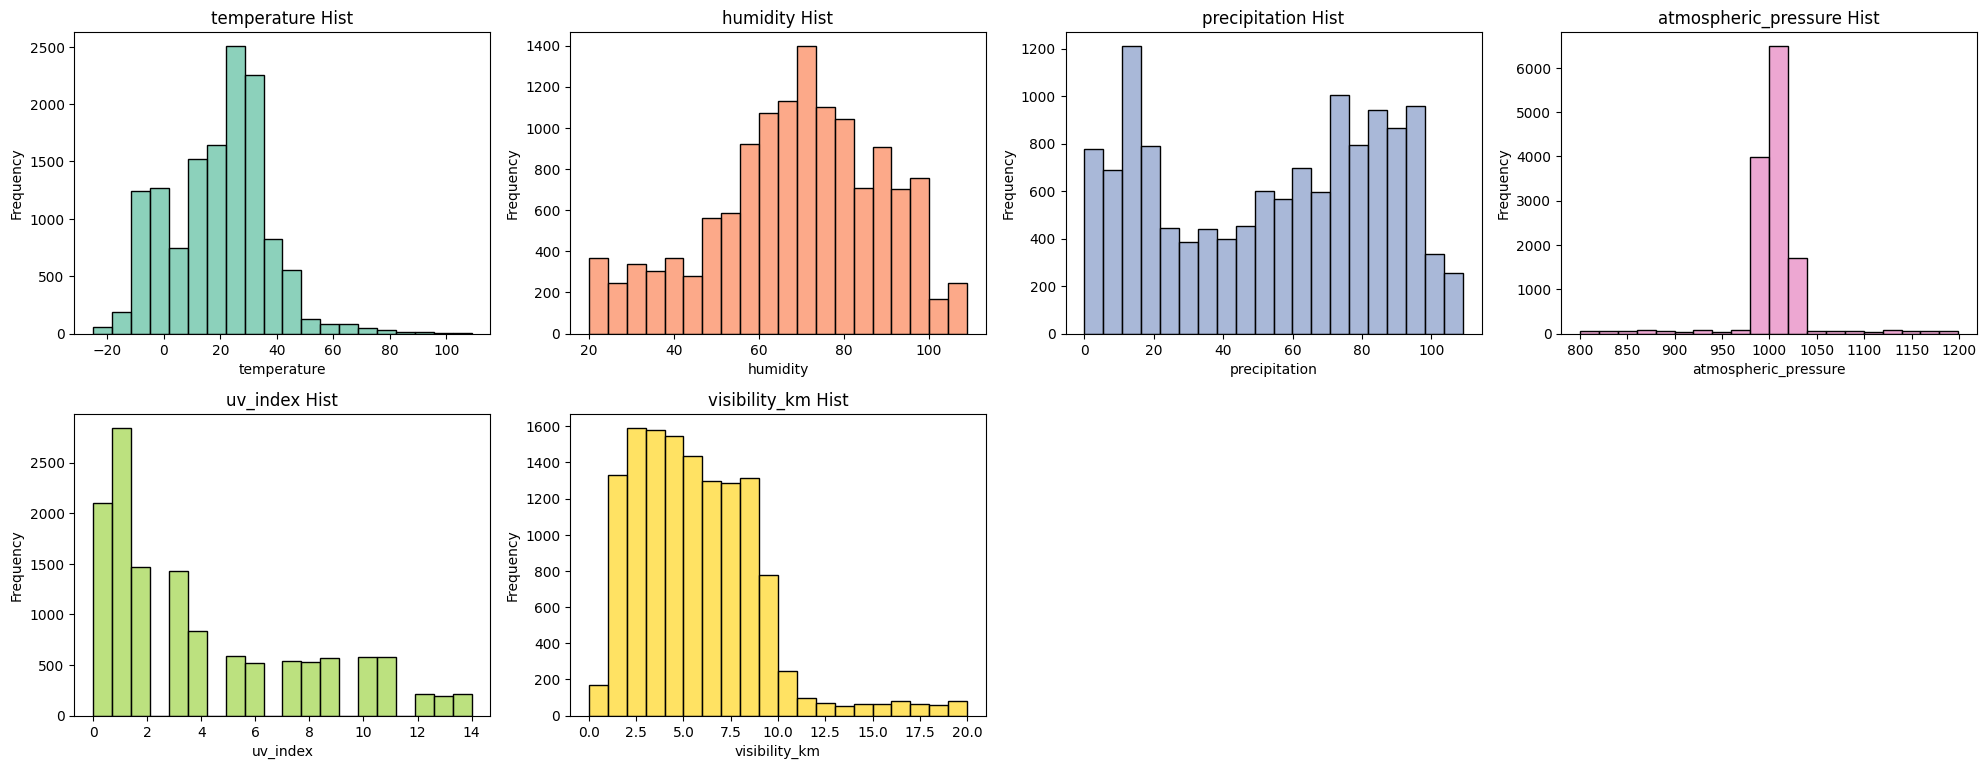

In [ ]:
colors = sns.color_palette("Set2", len(col_nums.columns))

n = 4
plots_per_row = n
plots_per_col = n

num_rows = len(col_nums.columns) // plots_per_row + (len(col_nums.columns) % plots_per_row > 0)

fig, axes = plt.subplots(nrows=plots_per_row, ncols=plots_per_col, figsize=(20, 15))

axes = axes.flatten()

for i, (col, color) in enumerate(zip(col_nums.columns, colors)):
    sns.histplot(x=col,bins=20,data=col_nums,ax=axes[i], color=color)
    axes[i].set_title(f"{col} Hist")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 이상값

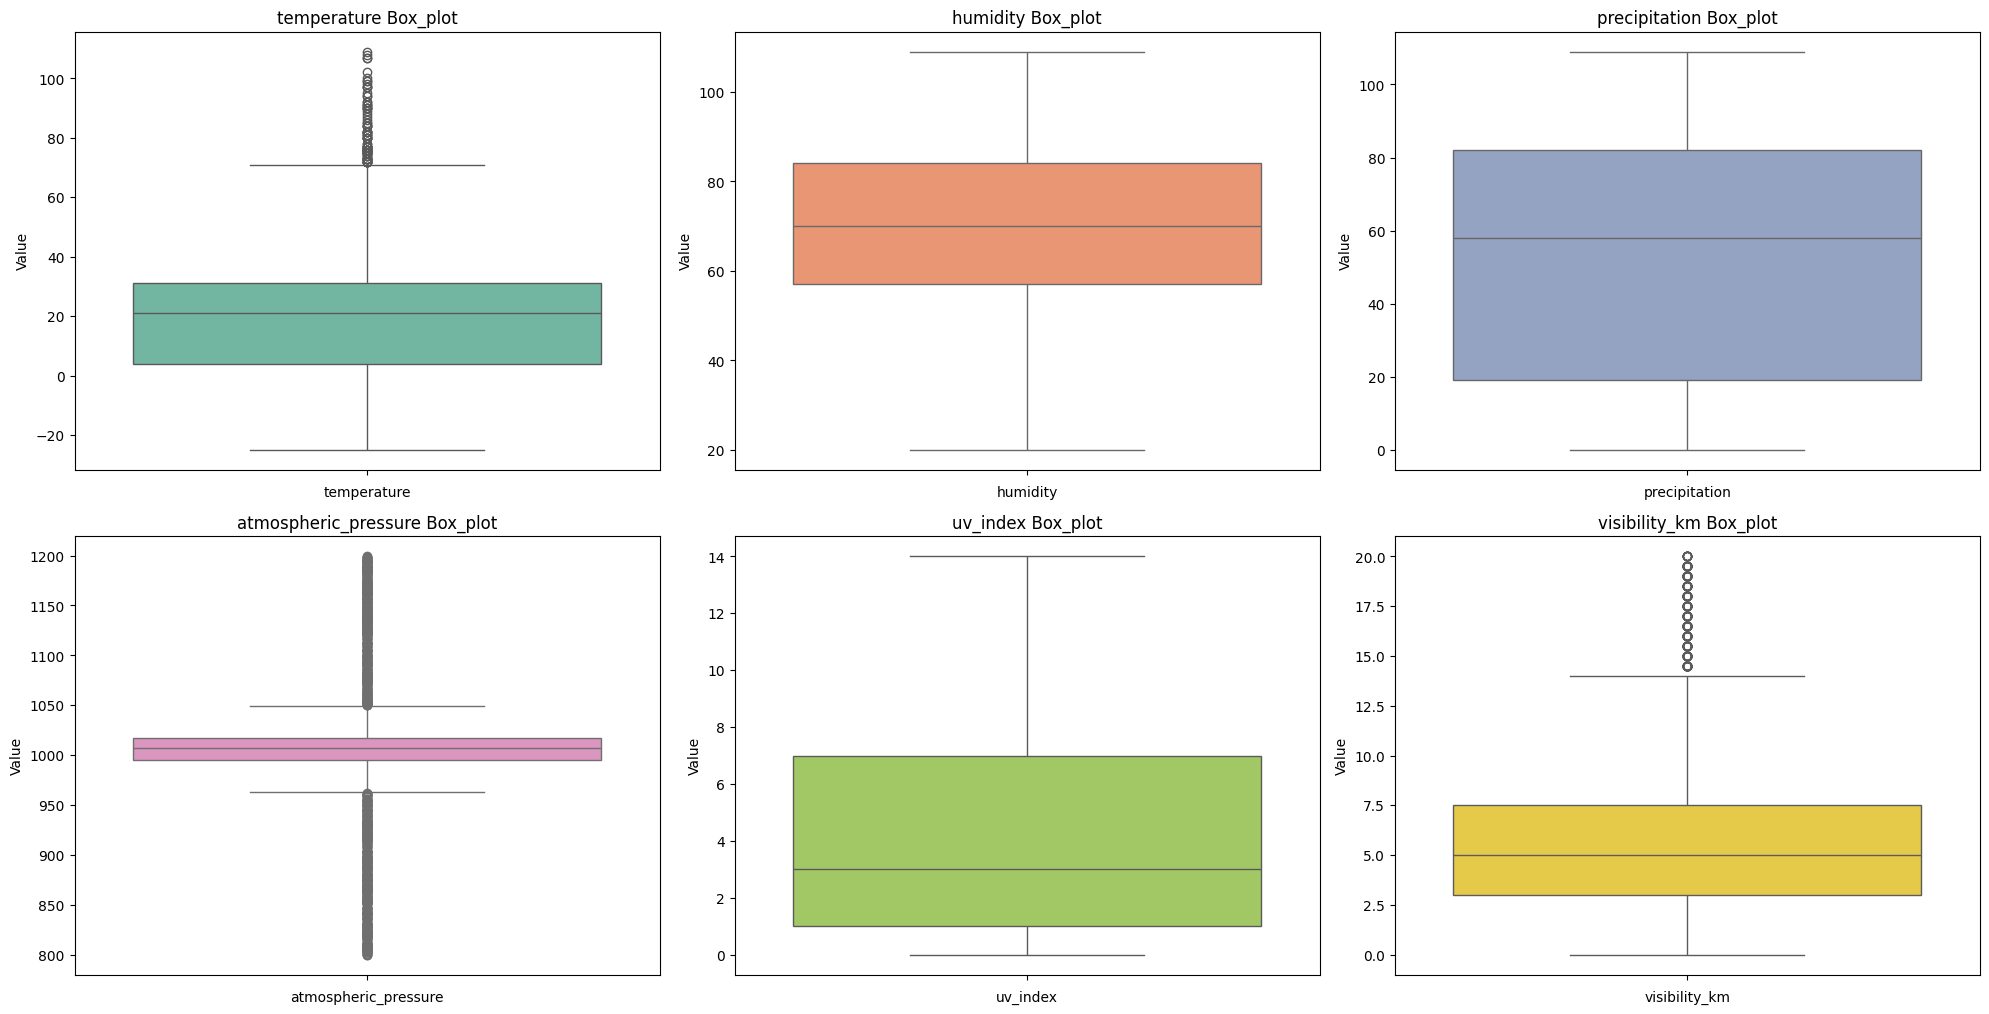

In [ ]:

colors = sns.color_palette("Set2", len(col_nums.columns))

# 행,열 개수
n = 3
plots_per_row = n
plots_per_col = n
# 필요한 격자 계산
num_rows = len(col_nums.columns) // plots_per_row + (len(col_nums.columns) % plots_per_row > 0)

fig, axes = plt.subplots(nrows=plots_per_row, ncols=plots_per_col, figsize=(20, 15))

axes = axes.flatten()

for i, (col, color) in enumerate(zip(col_nums.columns, colors)):
    sns.boxplot(y=col,data=col_nums,ax=axes[i], color=color)
    axes[i].set_title(f"{col} Box_plot")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Value")

# 사용되지 않은 axes 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 전처리

In [ ]:
df_pre = df.copy()
df_pre.drop(df_pre[df_pre['uv_index']>11].index,inplace=True)

In [ ]:
df['precipitation'] = df['precipitation'].apply(lambda x: 100 if x > 100 else (0 if x < 0 else x))

In [ ]:
# df = df[df['humidity'].between(15, 90)] drop 했음

In [ ]:
## 대기압 : 960~1040 범위로 클리핑

# 대기압의 중앙값 계산
median_pressure = df['atmospheric_pressure'].median()

# 대기압의 일반적인 범위 설정
lower_bound = 960
upper_bound = 1040

# 이상치 처리: 하한선과 상한선으로 클리핑
df['atmospheric_pressure'] = df['atmospheric_pressure'].clip(lower=lower_bound, upper=upper_bound)

# df['atmospheric_pressure'].describe().T


In [ ]:
# 기온(temperature) 전처리

# 역대 최고 온도인 섭씨 56도를 넘는 sample 제거
# 최저 온도는 가능한 범위에 있기 때문에 유지
df = df[df['temperature'] <= 56]

# 날씨가 눈이 오는데 기온이 섭씨 0도 이상인 sample 제거
#df = df.drop(df[(df['weather_type']=='Snowy') & (df['temperature'] > 0)].index)

# 계절이 여름인데 기온이 섭씨 0도 이하인 sample 제거
#df = df.drop(df[(df['season']=='Summer') & (df['temperature'] <= 0)].index)

## 데이터 분리

In [ ]:
X = df.drop('weather_type',axis=1)
y = df['weather_type']
X.shape, y.shape

((12936, 7), (12936,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape, X_test.shape

((10348, 7), (2588, 7))

## X,y 분리

In [ ]:
X_train.describe()

,temperature,humidity,precipitation,atmospheric_pressure,uv_index,visibility_km
count,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000
mean,18.024642,68.312524,52.640607,1005.465747,3.953324,5.463423
std,15.910396,20.105725,31.631453,16.572275,3.827745,3.363901
min,-25.000000,20.000000,0.000000,960.000000,0.000000,0.000000
25%,4.000000,57.000000,19.000000,994.610000,1.000000,3.000000
50%,21.000000,70.000000,57.000000,1007.340000,3.000000,5.000000
75%,30.000000,83.000000,81.000000,1016.650000,7.000000,7.500000
max,56.000000,109.000000,100.000000,1040.000000,14.000000,20.000000


In [ ]:
col_cate.columns

Index(['cloud_cover', 'weather_type'], dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
X_train[['cloud_cover']]=oe.fit_transform(X_train[['cloud_cover']])

In [ ]:
X_train[['cloud_cover']].head()

,cloud_cover
2633,0.0
3497,2.0
5246,0.0
8288,3.0
1161,0.0


- 라벨인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y_train_e =le.fit_transform(y_train)
y_train_e


array([3, 2, 3, ..., 3, 2, 0])

- 원 핫 인코딩

In [ ]:
from keras import utils
y_train_o= utils.to_categorical(y_train_e)
y_train_o, y_train_o.shape

(array([[0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.]], dtype=float32),
 (10348, 4))

In [ ]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
X_train_s = rs.fit_transform(X_train)
print(X_train_s)

[[ 0.53846154  0.5         0.29032258 ...  0.91560799 -0.5
   0.22222222]
 [-0.73076923 -0.34615385  0.4516129  ... -0.47549909 -0.33333333
  -0.44444444]
 [ 0.53846154 -1.5        -0.85483871 ...  0.55943739  0.33333333
   0.55555556]
 ...
 [ 0.84615385 -1.46153846 -0.61290323 ...  0.46823956  1.
   0.66666667]
 [-0.73076923 -0.03846154  0.58064516 ... -0.97867514 -0.5
  -0.66666667]
 [-0.38461538 -0.03846154 -0.69354839 ...  0.07622505  0.16666667
   0.22222222]]


In [ ]:
X_test.shape, y_test.shape

((2588, 7), (2588,))

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
X_test[['cloud_cover']]=oe.fit_transform(X_test[['cloud_cover']])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y_test_e =le.fit_transform(y_test)
y_test_e


array([2, 0, 3, ..., 0, 0, 1])

In [ ]:
X_test_s= rs.transform(X_test)
X_test_s

array([[-1.        ,  0.03846154,  0.56451613, ..., -1.09664247,
        -0.5       , -0.66666667],
       [-0.11538462, -0.65384615, -0.37096774, ...,  0.25317604,
         0.16666667,  0.11111111],
       [ 0.34615385, -0.34615385, -0.74193548, ...,  0.61343013,
         0.66666667,  0.44444444],
       ...,
       [-0.30769231, -0.38461538,  0.30645161, ..., -2.14791289,
         1.5       , -0.44444444],
       [ 0.5       , -0.69230769, -0.4516129 , ...,  0.31079855,
        -0.33333333,  0.11111111],
       [-0.34615385,  0.03846154,  0.48387097, ..., -0.58575318,
        -0.5       , -0.44444444]])

In [ ]:
type(X_test_s), X_test_s.shape

(numpy.ndarray, (2588, 7))

In [ ]:
print(X_train_s.shape, y_train_o.shape)
print(type(X_train_s),type(y_train_o))

(10348, 7) (10348, 4)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=64,activation='relu',input_shape=(X_train_s.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(units=32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(units=8, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(units=4, activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                512       
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 8)                 264       
                                                                 
 dropout_17 (Dropout)        (None, 8)                 0         
                                                                 
 dense_23 (Dense)            (None, 4)                

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
 metrics=['accuracy'])

In [ ]:
EPOCHS=100
BATCH_SIZE=32
history= model.fit(X_train_s,y_train_o,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_split=0.2
          )

Epoch 1/100
259/259 [==============================] - 4s 7ms/step - loss: 0.9249 - accuracy: 0.6496 - val_loss: 0.4856 - val_accuracy: 0.8768
Epoch 2/100
259/259 [==============================] - 1s 6ms/step - loss: 0.6041 - accuracy: 0.7969 - val_loss: 0.3568 - val_accuracy: 0.8966
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.5131 - accuracy: 0.8270 - val_loss: 0.3047 - val_accuracy: 0.9072
Epoch 4/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4587 - accuracy: 0.8397 - val_loss: 0.2686 - val_accuracy: 0.9130
Epoch 5/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4239 - accuracy: 0.8524 - val_loss: 0.2521 - val_accuracy: 0.9092
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3930 - accuracy: 0.8506 - val_loss: 0.2402 - val_accuracy: 0.9072
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3824 - accuracy: 0.8587 - val_loss: 0.2246 - val_accuracy: 0.9111

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

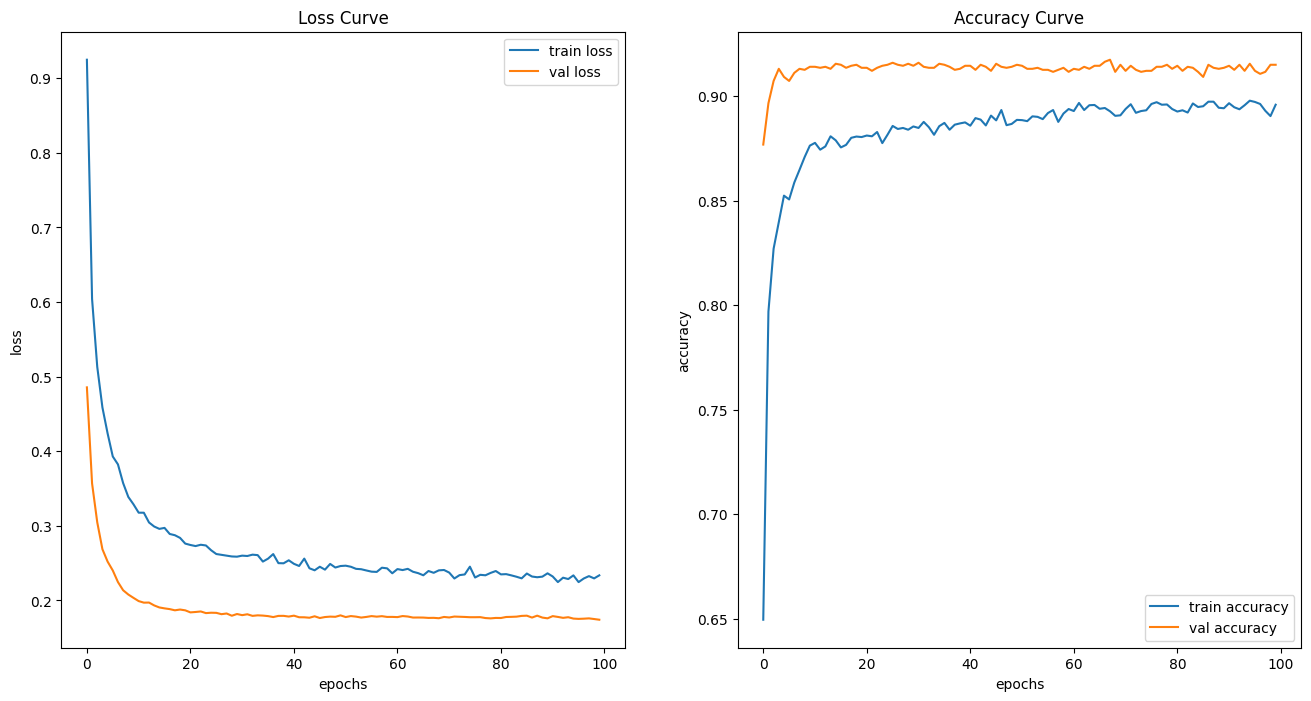

In [ ]:
plot_history(history)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true,y_pred,aver):
  print('accuracy',accuracy_score(y_true,y_pred))
  print('recall',recall_score(y_true,y_pred,average=aver))
  print('precision',precision_score(y_true,y_pred,average=aver))
  print('f1_score',f1_score(y_true,y_pred, average=aver))

  cfm = confusion_matrix(y_true,y_pred)
  s = sns.heatmap(cfm,annot=True,cmap='Blues',fmt='d',cbar=False)
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()

In [ ]:
y_pred = model.predict(X_test_s)
y_pred

81/81 [==============================] - 0s 2ms/step


array([[1.2138152e-09, 1.8163161e-07, 9.9999970e-01, 3.7539745e-14],
       [9.9984264e-01, 8.3552084e-05, 2.3863091e-08, 7.3862189e-05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       ...,
       [2.6109841e-01, 2.4559122e-01, 2.8296036e-01, 2.1034999e-01],
       [9.9999714e-01, 2.1683607e-06, 2.0651831e-11, 6.7708174e-07],
       [1.0136577e-03, 9.9896228e-01, 4.5830589e-06, 1.9487932e-05]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([2, 0, 3, ..., 2, 0, 1])

In [ ]:
confusion_matrix(y_test_e,y_pred)

array([[578,  39,   8,   7],
       [ 53, 611,  13,   2],
       [ 41,   5, 585,   4],
       [ 54,   8,  12, 568]])

accuracy 0.9049459041731066
recall 0.9051011829080515
precision 0.9104846511852398
f1_score 0.9061138729955976


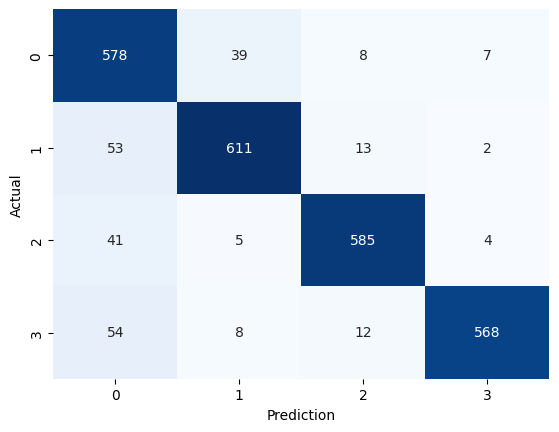

In [ ]:
print_metrics(y_test_e,y_pred,'macro')

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier()

In [ ]:
# 모델 학습
model.fit(X_train_s, y_train_o)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test_s)
y_pred = np.argmax(y_pred,axis=1)

accuracy 0.9080370942812983
recall 0.9084098768887616
precision 0.9153508819819531
f1_score 0.9094464495201858


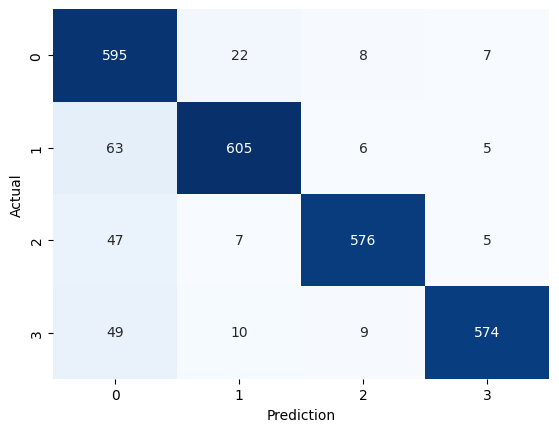

In [ ]:
print_metrics(y_test_e,y_pred,'macro')